## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

## Importing Data & Preprocessing

In [2]:
# load the iris dataset as an example 
from sklearn.datasets import load_iris 
iris = load_iris() 

# store the feature matrix (X) and response vector (y) 
X = iris.data 
y = iris.target 

# store the feature and target names 
feature_names = iris.feature_names 
target_names = iris.target_names 
colors = ['navy', 'turquoise', 'darkorange']
# printing features and target names of our dataset 
print("Feature names:", feature_names) 
print("Target names:", target_names) 

# printing first 5 input rows 
print("\nFirst 5 rows of X:\n", X[:5])


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 5 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8 ,test_size=0.2, random_state=0)

### Ploting different attribute of data to check which contribute more


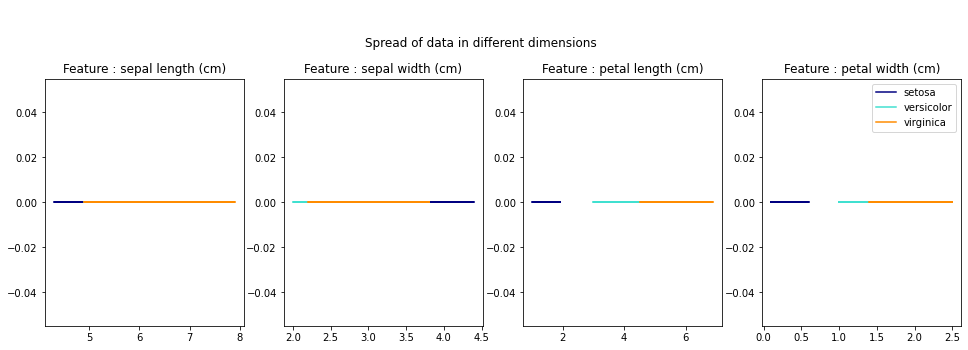

In [4]:
# Create figure
fig = plt.figure(figsize=(25, 10))
fig.suptitle("\n\nSpread of data in different dimensions" )

# Plot results
for j in range(4):
    ax = fig.add_subplot(2, 6, 2 + j + (j >3))
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        ax.set_title("Feature : %s" %(feature_names[j]))
        ax.plot(X[y == i, j],np.zeros_like(X[y == i, j]), color=color,label=target_name)
plt.legend(loc='best')
plt.show()

# Training and Making Predictions

### Prediction using Random Forrest

In [5]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
# accuracy = classifier.score(X_test,y_test)
y_pred = classifier.predict(X_test)
# print(accuracy)

In [6]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy Using Random Forrest Classifier is ' + str(accuracy_score(y_test, y_pred)))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy Using Random Forrest Classifier is 1.0


### Prediction using Decision Tree

In [7]:
# Use a Decision Tree classifier to evaluate the methods
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)
acc = tree.score(X_test,y_test)
print(acc)

1.0


In [8]:
lda2 = LinearDiscriminantAnalysis(n_components=2) # model for reduction in 2D
lda1 = LinearDiscriminantAnalysis(n_components=1) # model for reduction in 1D

In [9]:
tree = DecisionTreeClassifier(criterion="entropy")
tree.fit(X_train,y_train)
accuracy = tree.score(X_test,y_test)
print("Accuracy predicted using Decision Tree ",accuracy)

Accuracy predicted using Decision Tree  1.0


## Visualising 

### 1-D

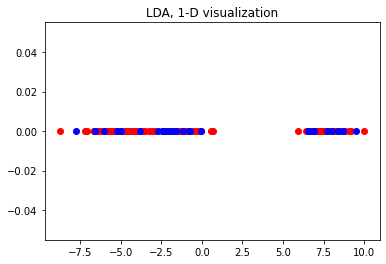

In [10]:
LDA = LinearDiscriminantAnalysis(n_components=1) # model for reduction in 1D


# Fit the method's model
LDA.fit(X_train, y_train)

# Fit the classifier on the embedded training set
tree.fit(LDA.transform(X_train), y_train)

# Compute the  accuracy on the embedded test set
X_p_transformed = LDA.transform(X_train)
X_n_transformed = LDA.transform(X_test)
plt.figure()
plt.scatter(X_p_transformed,np.zeros(len(X_train)),c='r')
plt.scatter(X_n_transformed,np.zeros(len(X_test)),c='b')
plt.title("LDA, 1-D visualization")
plt.show()

### 2-D

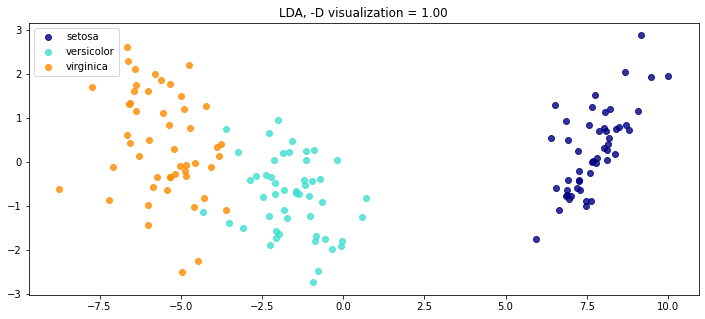

In [11]:
# Fit the method's model
lda2.fit(X_train, y_train)

# Fit a Decision Tree classifier on the embedded training set
tree.fit(lda2.transform(X_train), y_train)

# Compute the Decision Tree accuracy on the embedded test set
acc = tree.score(lda2.transform(X_test), y_test)
X_2 = lda2.transform(X)
plt.figure(figsize=(12,5))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_2[y == i, 0], X_2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best')
plt.title("LDA, -D visualization = {:.2f}".format(acc))
plt.show()

### 3-D

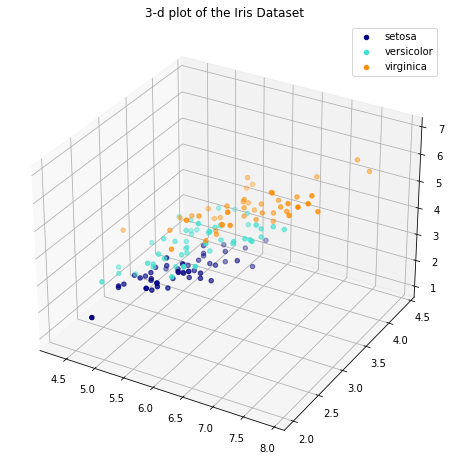

In [12]:
#Plotting in 3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-d plot of the Iris Dataset")
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    ax.scatter(X[y == i, 0], X[y == i, 1],X[y == i, 2], color = color,
                label = target_name)
plt.legend(loc='best')
plt.show() 